# STUFF

http://aftitanic.free.fr/titanic/passagers/

# Things to improve

- get infos to consider name, ticket and cabin variables

# Dependencies

In [1]:
'''!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mglearn
!pip install scikit-learn
!pip install seaborn'''

'!pip install numpy\n!pip install pandas\n!pip install matplotlib\n!pip install mglearn\n!pip install scikit-learn\n!pip install seaborn'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

#Selecting features

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Imputing missing values

from sklearn.impute import KNNImputer

#Scaling
from sklearn.preprocessing import MinMaxScaler

# Dataset

In [3]:
df=pd.read_csv("train.csv",index_col=0)

Variable	Definition	Key \
survival 	Survival 	0 = No, 1 = Yes \
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd \
sex 	Sex 	\
Age 	Age in years 	\
sibsp 	# of siblings / spouses aboard the Titanic 	\
parch 	# of parents / children aboard the Titanic 	\
ticket 	Ticket number 	\
fare 	Passenger fare 	\
cabin 	Cabin number \
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.shape

(891, 11)

In [5]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [6]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#target
#y = df.Survived.values

categorical_variables = ['Survived','Name','Sex','Ticket','Cabin','Embarked']

quantitative_variables = ['Age','SibSp','Parch','Fare']

ordinal_variables = ['Pclass']

In [9]:
X = df[categorical_variables + quantitative_variables + ordinal_variables].values

X_quantitative = df[quantitative_variables].values

X_categorical = df[categorical_variables].values

X_ordinal = df[ordinal_variables].values

In [10]:
print(df.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


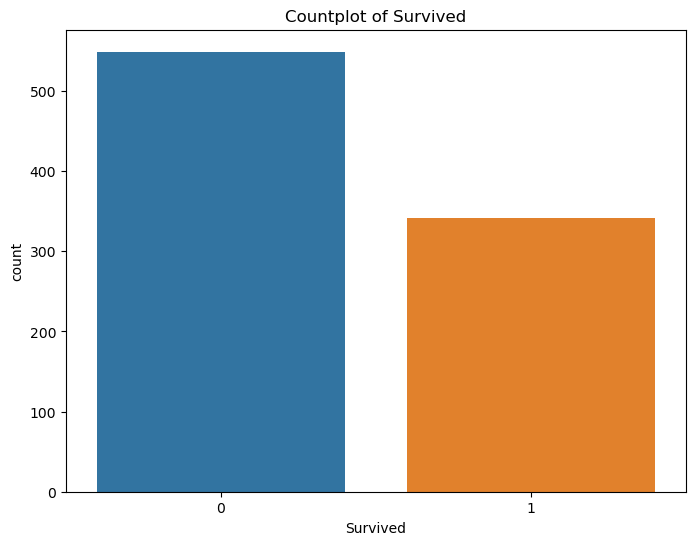

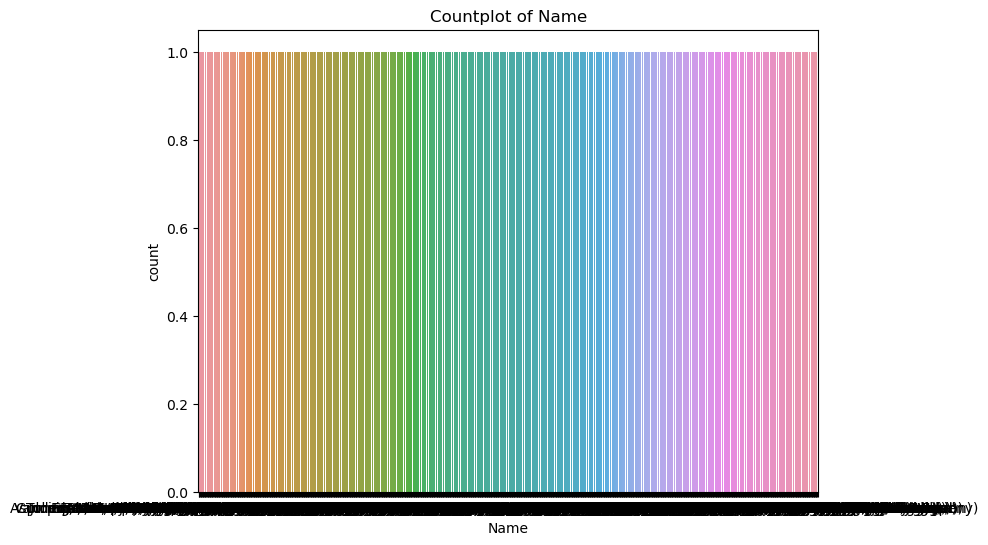

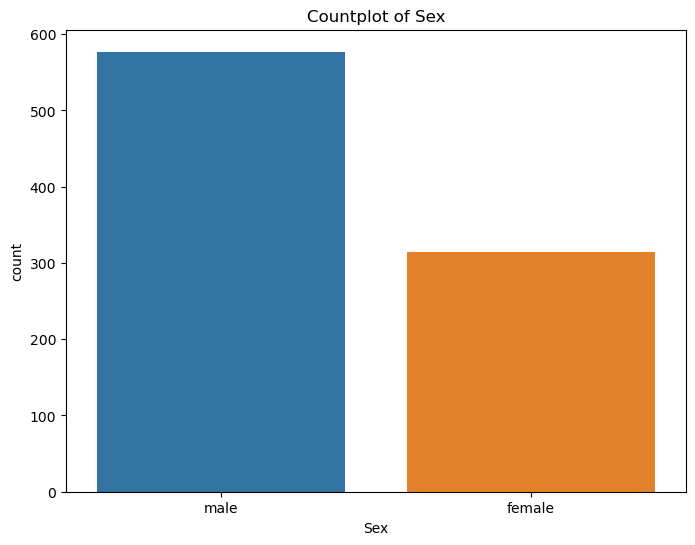

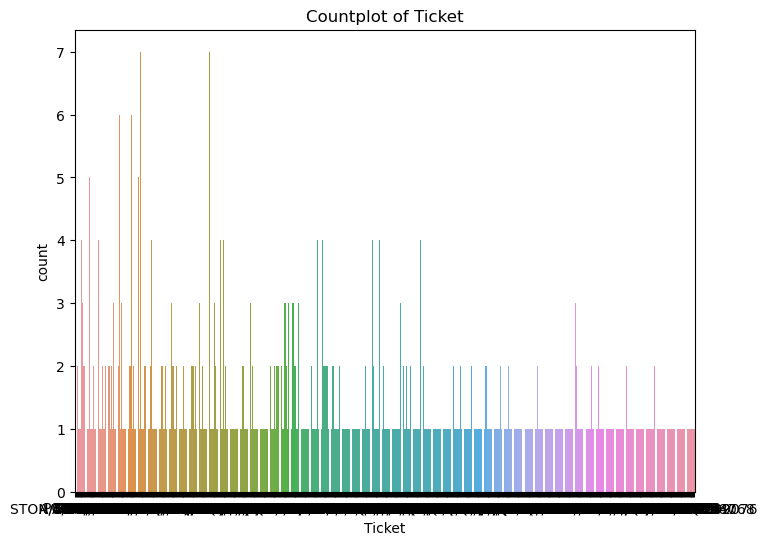

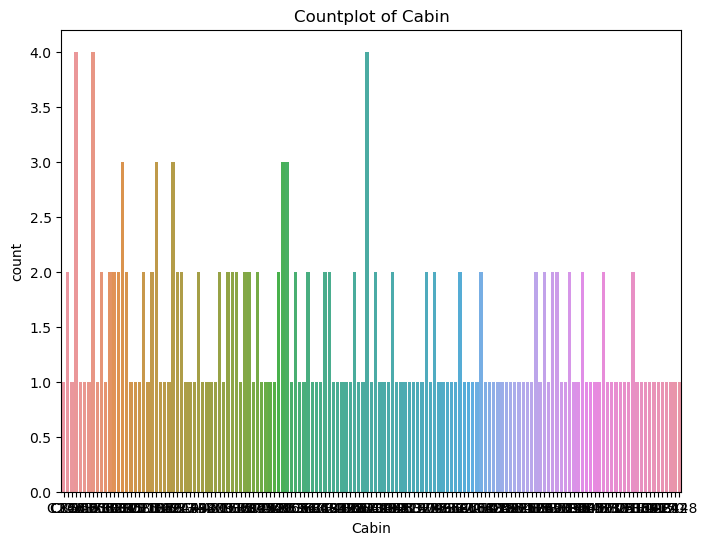

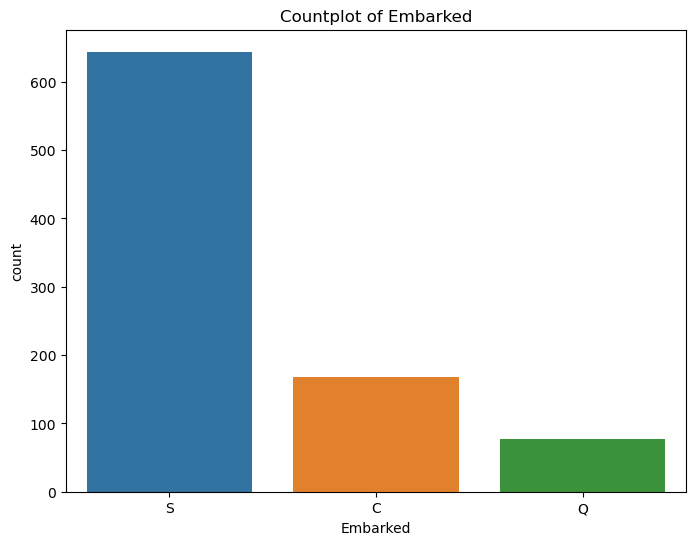

In [11]:
for i, col in enumerate(df[categorical_variables].columns):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df[categorical_variables], x=col)
    plt.title(f'Countplot of {col}')
    plt.savefig(f'/home/estelle/code/titanic/figures/countplot_{col}.png')
    plt.show()

/home/estelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


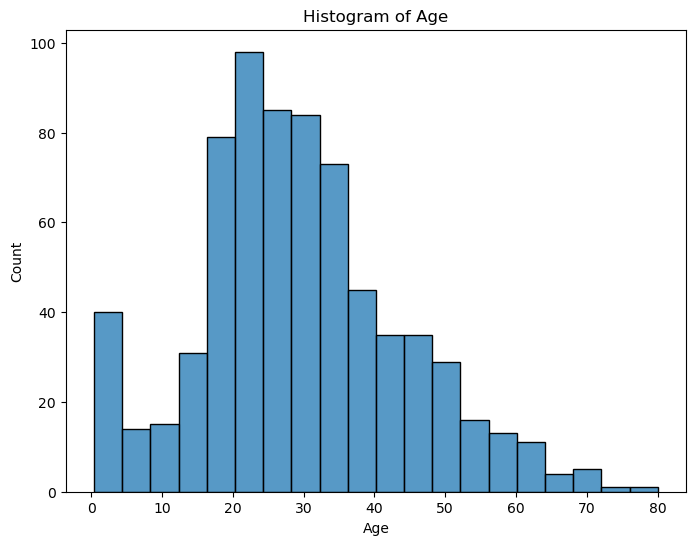

/home/estelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


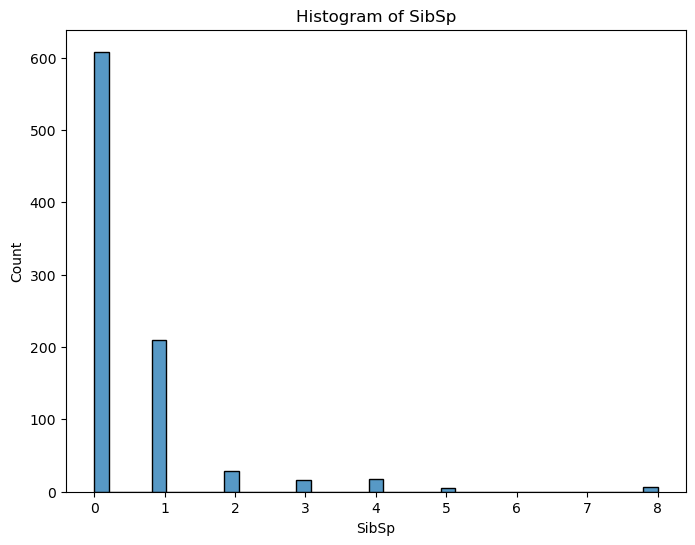

/home/estelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


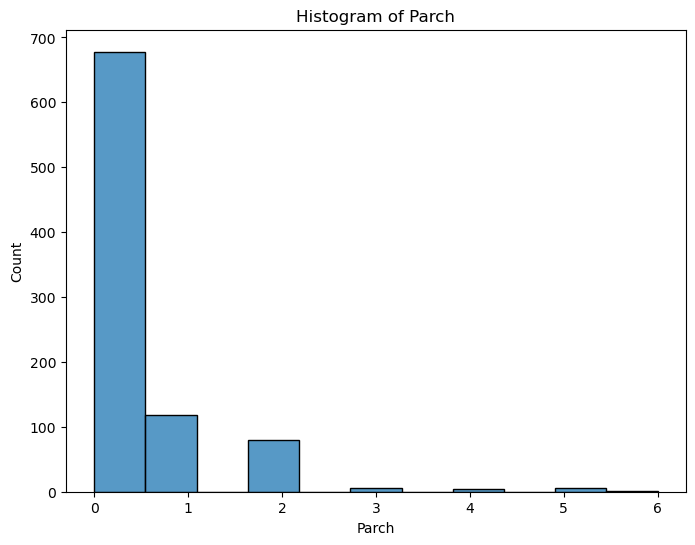

/home/estelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


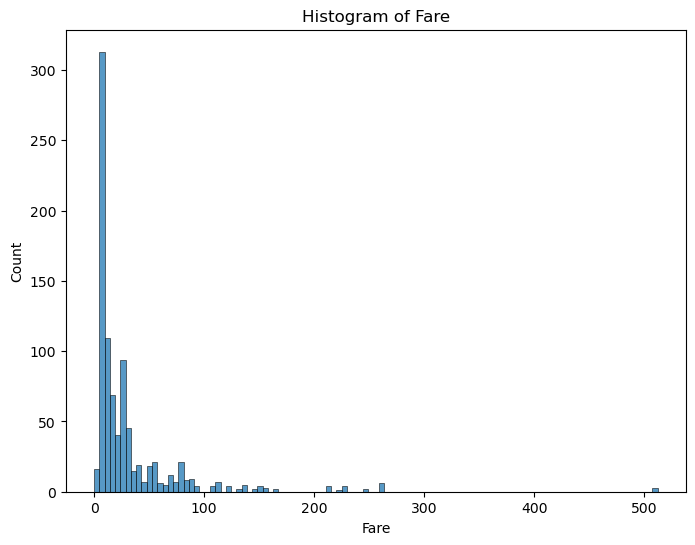

In [12]:
for i, col in enumerate(df[quantitative_variables].columns):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[quantitative_variables], x=col)
    plt.title(f'Histogram of {col}')
    plt.savefig(f'/home/estelle/code/titanic/figures/histogram_{col}.png')
    plt.show()

In [13]:
zero_fare = df[df['Fare'] == 0]
print(zero_fare)

             Survived  Pclass                              Name   Sex   Age  \
PassengerId                                                                   
180                 0       3               Leonard, Mr. Lionel  male  36.0   
264                 0       1             Harrison, Mr. William  male  40.0   
272                 1       3      Tornquist, Mr. William Henry  male  25.0   
278                 0       2       Parkes, Mr. Francis "Frank"  male   NaN   
303                 0       3   Johnson, Mr. William Cahoone Jr  male  19.0   
414                 0       2    Cunningham, Mr. Alfred Fleming  male   NaN   
467                 0       2             Campbell, Mr. William  male   NaN   
482                 0       2  Frost, Mr. Anthony Wood "Archie"  male   NaN   
598                 0       3               Johnson, Mr. Alfred  male  49.0   
634                 0       1     Parr, Mr. William Henry Marsh  male   NaN   
675                 0       2        Watson, Mr. Enn

In [14]:
def filter(df, column_name, word):
    filtered_df = df[df[column_name].str.contains(word, case = False, na = False)]
    return filtered_df

In [15]:
print(filter(df,'Ticket','LINE'))

             Survived  Pclass                             Name   Sex   Age  \
PassengerId                                                                  
180                 0       3              Leonard, Mr. Lionel  male  36.0   
272                 1       3     Tornquist, Mr. William Henry  male  25.0   
303                 0       3  Johnson, Mr. William Cahoone Jr  male  19.0   
598                 0       3              Johnson, Mr. Alfred  male  49.0   

             SibSp  Parch Ticket  Fare Cabin Embarked  
PassengerId                                            
180              0      0   LINE   0.0   NaN        S  
272              0      0   LINE   0.0   NaN        S  
303              0      0   LINE   0.0   NaN        S  
598              0      0   LINE   0.0   NaN        S  


/home/estelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


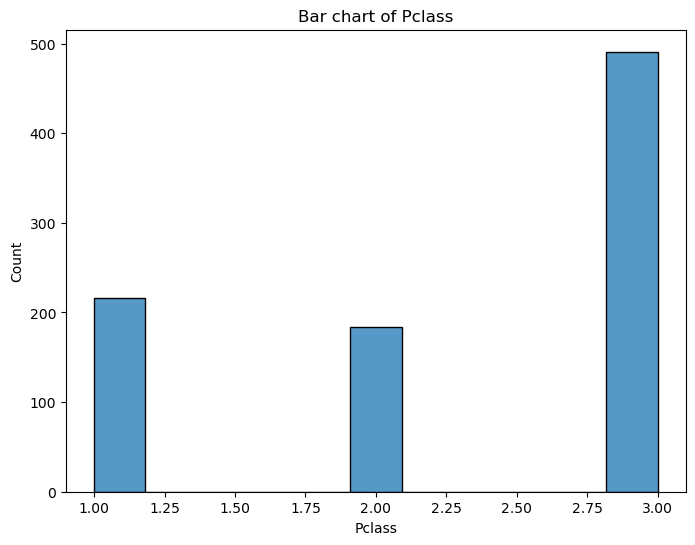

In [16]:
for i, col in enumerate(df[ordinal_variables].columns):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df[ordinal_variables], x=col)
    plt.title(f'Bar chart of {col}')
    plt.savefig(f'/home/estelle/code/titanic/figures/bar_chart{col}.png')
    plt.show()

In [17]:
categorical_variables = ['Survived','Sex','Embarked']

quantitative_variables = ['Age','SibSp','Parch','Fare']

ordinal_variables = ['Pclass']

In [18]:
X = df[categorical_variables + quantitative_variables + ordinal_variables].values

X_quantitative = df[quantitative_variables].values

X_categorical = df[categorical_variables].values

X_ordinal = df[ordinal_variables].values

In [19]:
df=pd.DataFrame(X, columns = ['Survived','Sex','Embarked','Age','SibSp','Parch','Fare','Pclass'])

In [20]:
df.head()

Survived     Sex Embarked   Age SibSp Parch     Fare Pclass
0        0    male        S  22.0     1     0     7.25      3
1        1  female        C  38.0     1     0  71.2833      1
2        1  female        S  26.0     0     0    7.925      3
3        1  female        S  35.0     1     0     53.1      1
4        0    male        S  35.0     0     0     8.05      3

# Encoding

## Categorical variables (One-Hot Encoding)

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(X_categorical)

OneHotEncoder()

In [23]:
encoded_X_categorical = one_hot_encoder.transform(X_categorical)

In [24]:
df_categorical=df[categorical_variables]
categorical_cols = categorical_variables
df_encoded=pd.get_dummies(df,columns=categorical_cols)
print("Number of new columns generated after one-hot encoding:",df_encoded.shape[1]-df.shape[1])

Number of new columns generated after one-hot encoding: 4


In [25]:
categorical_cols

['Survived', 'Sex', 'Embarked']

In [26]:
X_categorical_encoded = pd.concat([df_categorical,df_encoded],axis=1)
X_categorical_encoded

Survived     Sex Embarked   Age SibSp Parch     Fare Pclass  Survived_0  \
0          0    male        S  22.0     1     0     7.25      3        True   
1          1  female        C  38.0     1     0  71.2833      1       False   
2          1  female        S  26.0     0     0    7.925      3       False   
3          1  female        S  35.0     1     0     53.1      1       False   
4          0    male        S  35.0     0     0     8.05      3        True   
..       ...     ...      ...   ...   ...   ...      ...    ...         ...   
886        0    male        S  27.0     0     0     13.0      2        True   
887        1  female        S  19.0     0     0     30.0      1       False   
888        0  female        S   NaN     1     2    23.45      3        True   
889        1    male        C  26.0     0     0     30.0      1       False   
890        0    male        Q  32.0     0     0     7.75      3        True   

     Survived_1  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         False       False      True       False       False        True  
1          True        True     False        True       False       False  
2          True        True     False       False       False        True  
3          True        True     False       False       False        True  
4         False       False      True       False       False        True  
..          ...         ...       ...         ...         ...         ...  
886       False       False      True       False       False        True  
887        True        True     False       False       False        True  
888       False        True     False       False       False        True  
889        True       False      True        True       False       False  
890       False       False      True       False        True       False  

[891 rows x 15 columns]

In [27]:
df_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns = ['Survived_0','Survived_1','Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])

## Ordinal variables (Ordinal Encoding)

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
ordinal_encoder = OrdinalEncoder()

In [30]:
X_ordinal_encoded = np.zeros_like(X_ordinal)

In [31]:
for i in range(X_ordinal.shape[1]):
    column_reshape = X_ordinal[:,i].reshape(-1,1)
    column_encoded = ordinal_encoder.fit_transform(column_reshape)
    X_ordinal_encoded[:,i] = column_encoded.flatten()

In [32]:
for i, col in enumerate(ordinal_variables):
    print(f"===== encoded classes for {col}: {ordinal_encoder.categories_}")

===== encoded classes for Pclass: [array([1, 2, 3])]


In [33]:
df_ordinal_encoded = pd.DataFrame(X_ordinal_encoded, columns = ['Pclass'])

## Creating new encoded dataset

In [34]:
df_quantitative = pd.DataFrame(X_quantitative,columns=['Age','SibSp','Parch','Fare'])

In [35]:
df_encoded = pd.concat([df_quantitative, df_categorical_encoded, df_ordinal_encoded], axis=1)

In [36]:
df_encoded.head()

Age  SibSp  Parch     Fare  Survived_0  Survived_1  Sex_male  Sex_female  \
0  22.0    1.0    0.0   7.2500        True       False      True       False   
1  38.0    1.0    0.0  71.2833       False        True     False        True   
2  26.0    0.0    0.0   7.9250       False        True     False        True   
3  35.0    1.0    0.0  53.1000       False        True     False        True   
4  35.0    0.0    0.0   8.0500        True       False      True       False   

   Embarked_C  Embarked_Q  Embarked_S  Pclass  
0       False       False        True       2  
1        True       False       False       0  
2       False       False        True       2  
3       False       False        True       0  
4       False       False        True       2

# Selecting features

## With correlation matrix

In [37]:
threshold = 0.7

In [38]:
correlation_matrix = df_encoded.corr()
correlation_matrix

Age     SibSp     Parch      Fare  Survived_0  Survived_1  \
Age         1.000000 -0.308247 -0.189119  0.096067    0.077221   -0.077221   
SibSp      -0.308247  1.000000  0.414838  0.159651    0.035322   -0.035322   
Parch      -0.189119  0.414838  1.000000  0.216225   -0.081629    0.081629   
Fare        0.096067  0.159651  0.216225  1.000000   -0.257307    0.257307   
Survived_0  0.077221  0.035322 -0.081629 -0.257307    1.000000   -1.000000   
Survived_1 -0.077221 -0.035322  0.081629  0.257307   -1.000000    1.000000   
Sex_male    0.093254 -0.114631 -0.245489 -0.182333    0.543351   -0.543351   
Sex_female -0.093254  0.114631  0.245489  0.182333   -0.543351    0.543351   
Embarked_C  0.036261 -0.059528 -0.011069  0.269335   -0.168240    0.168240   
Embarked_Q -0.022405 -0.026354 -0.081228 -0.117216   -0.003650    0.003650   
Embarked_S -0.032523  0.070941  0.063036 -0.166603    0.155660   -0.155660   
Pclass     -0.369226  0.083081  0.018443 -0.549500    0.338481   -0.338481   

            Sex_male  Sex_female  Embarked_C  Embarked_Q  Embarked_S    Pclass  
Age         0.093254   -0.093254    0.036261   -0.022405   -0.032523 -0.369226  
SibSp      -0.114631    0.114631   -0.059528   -0.026354    0.070941  0.083081  
Parch      -0.245489    0.245489   -0.011069   -0.081228    0.063036  0.018443  
Fare       -0.182333    0.182333    0.269335   -0.117216   -0.166603 -0.549500  
Survived_0  0.543351   -0.543351   -0.168240   -0.003650    0.155660  0.338481  
Survived_1 -0.543351    0.543351    0.168240    0.003650   -0.155660 -0.338481  
Sex_male    1.000000   -1.000000   -0.082853   -0.074115    0.125722  0.131900  
Sex_female -1.000000    1.000000    0.082853    0.074115   -0.125722 -0.131900  
Embarked_C -0.082853    0.082853    1.000000   -0.148258   -0.778359 -0.243292  
Embarked_Q -0.074115    0.074115   -0.148258    1.000000   -0.496624  0.221009  
Embarked_S  0.125722   -0.125722   -0.778359   -0.496624    1.000000  0.081720  
Pclass      0.131900   -0.131900   -0.243292    0.221009    0.081720  1.000000

threshold = 0.8 is a bit hard, should be better with 0.7

In [39]:
correlation_pairs = (correlation_matrix.stack()
                     .loc[lambda x: (x > threshold) | (x < -threshold)]
                     .reset_index()
                     .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]
correlation_pairs['Sorted Features'] = correlation_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Sorted Features'])
correlation_pairs.drop(columns=['Sorted Features'], inplace = True)
correlation_pairs

Feature 1   Feature 2  Correlation
5   Survived_0  Survived_1    -1.000000
9     Sex_male  Sex_female    -1.000000
13  Embarked_C  Embarked_S    -0.778359

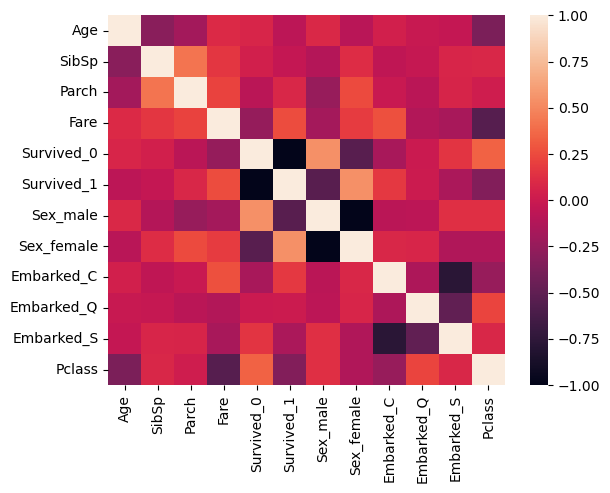

In [40]:
sns.heatmap(
    df_encoded.corr(),
)
plt.savefig(f'/home/estelle/code/titanic/figures/correlation_heatmap.png')

## With random forests

In [41]:
y = df_encoded.Survived_1.values

X = df_encoded[['Age','SibSp','Parch','Fare','Sex_male','Sex_female','Embarked_C','Embarked_Q','Embarked_S','Pclass']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [43]:
forest = RandomForestClassifier(n_estimators = 500, random_state = 0)

In [44]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [45]:
forest.predict(X_test)

array([ True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,

In [46]:
importances = forest.feature_importances_
idx = (-importances).argsort()
sorted_features = [X.columns[i] for i in idx]
sorted_importances = importances[idx]

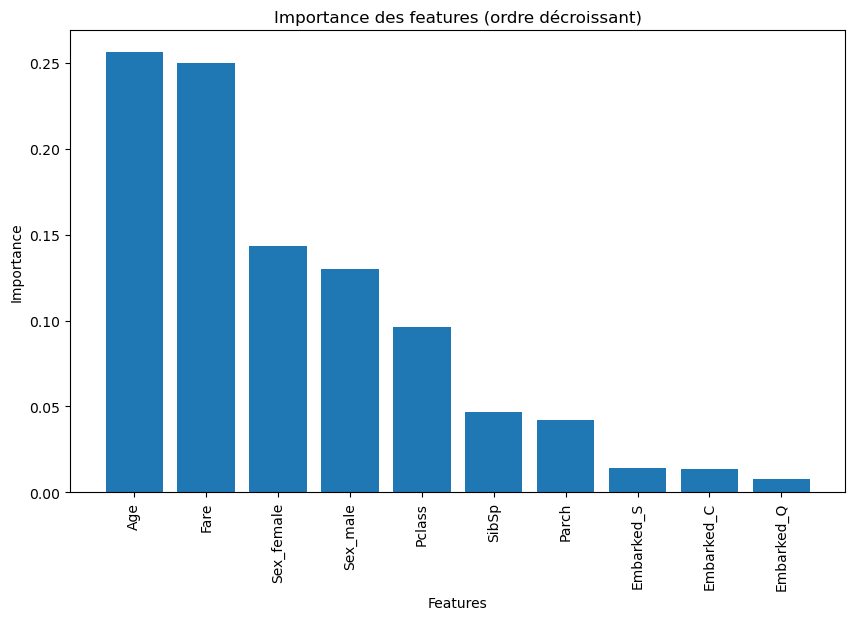

In [47]:
plt.figure(figsize=(10,6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)),sorted_features,rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Importance des features (ordre décroissant)')
plt.savefig(f'/home/estelle/code/titanic/figures/importance_features.png')
plt.show()

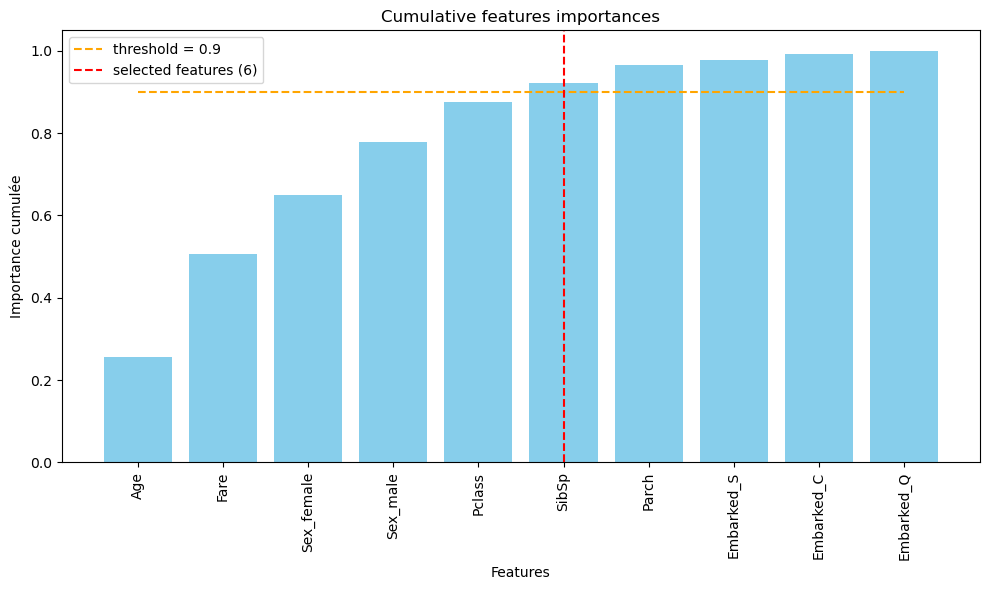

In [48]:
threshold = 0.9

cumulative_importances = np.cumsum(sorted_importances)

selected_index = np.where(cumulative_importances >= threshold)[0][0]

plt.figure(figsize=(10,6))
plt.bar(range(len(sorted_features)),cumulative_importances,align='center',color='skyblue')
plt.plot(range(len(sorted_features)),[threshold] * len(sorted_features), color = 'orange', linestyle='--', label=f'threshold = {threshold}')
plt.axvline(x=selected_index,color='red',linestyle='--',label=f'selected features ({selected_index+1})')
plt.xticks(range(len(sorted_features)),sorted_features,rotation='vertical')
plt.ylabel('Importance cumulée')
plt.xlabel('Features')
plt.title('Cumulative features importances')
plt.legend()
plt.tight_layout()
plt.savefig(f'/home/estelle/code/titanic/figures/cumulative_importance_features.png')
plt.show()

## Creating new dataset with features selected

I've decided to drop the following columns : \
thanks to the correlation matrix :
- Survived_0
- Sex_female

thanks to the random forests :
- Embarked_C
- Embarked_S
- Embarked_Q

In [49]:
df_encoded.head()

Age  SibSp  Parch     Fare  Survived_0  Survived_1  Sex_male  Sex_female  \
0  22.0    1.0    0.0   7.2500        True       False      True       False   
1  38.0    1.0    0.0  71.2833       False        True     False        True   
2  26.0    0.0    0.0   7.9250       False        True     False        True   
3  35.0    1.0    0.0  53.1000       False        True     False        True   
4  35.0    0.0    0.0   8.0500        True       False      True       False   

   Embarked_C  Embarked_Q  Embarked_S  Pclass  
0       False       False        True       2  
1        True       False       False       0  
2       False       False        True       2  
3       False       False        True       0  
4       False       False        True       2

In [50]:
df_final  = df_encoded.drop(columns = ['Survived_0','Sex_female','Embarked_C','Embarked_S','Embarked_Q'])

In [51]:
df_final.head()

Age  SibSp  Parch     Fare  Survived_1  Sex_male  Pclass
0  22.0    1.0    0.0   7.2500       False      True       2
1  38.0    1.0    0.0  71.2833        True     False       0
2  26.0    0.0    0.0   7.9250        True     False       2
3  35.0    1.0    0.0  53.1000        True     False       0
4  35.0    0.0    0.0   8.0500       False      True       2

In [52]:
df_final = df_final.rename(columns={"Survived_1": "Survived"})

In [53]:
df_final.head()

Age  SibSp  Parch     Fare  Survived  Sex_male  Pclass
0  22.0    1.0    0.0   7.2500     False      True       2
1  38.0    1.0    0.0  71.2833      True     False       0
2  26.0    0.0    0.0   7.9250      True     False       2
3  35.0    1.0    0.0  53.1000      True     False       0
4  35.0    0.0    0.0   8.0500     False      True       2

# Imputing missing values

In [54]:
df_final.shape

(891, 7)

In [55]:
X = df_final[['Age','SibSp','Parch','Fare','Survived','Sex_male','Pclass']].values

In [56]:
X.shape

(891, 7)

In [57]:
print(X)

[[22.0 1.0 0.0 ... False True 2]
 [38.0 1.0 0.0 ... True False 0]
 [26.0 0.0 0.0 ... True False 2]
 ...
 [nan 1.0 2.0 ... False False 2]
 [26.0 0.0 0.0 ... True True 0]
 [32.0 0.0 0.0 ... False True 2]]


In [58]:
print(df_final.isna().sum())

Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
Sex_male      0
Pclass        0
dtype: int64


sqrt(N) = optimal K \
sqrt(891) = 29.85

In [59]:
knn_imputer = KNNImputer(n_neighbors=30, weights="uniform")
knn_imputer.fit(X)

KNNImputer(n_neighbors=30)

In [60]:
X_imputed = knn_imputer.transform(X)
X_imputed.shape

(891, 7)

In [61]:
df_final = pd.DataFrame(X_imputed, columns = ['Age','SibSp','Parch','Fare','Survived','Sex_male','Pclass'])

In [62]:
df_final.head()

Age  SibSp  Parch     Fare  Survived  Sex_male  Pclass
0  22.0    1.0    0.0   7.2500       0.0       1.0     2.0
1  38.0    1.0    0.0  71.2833       1.0       0.0     0.0
2  26.0    0.0    0.0   7.9250       1.0       0.0     2.0
3  35.0    1.0    0.0  53.1000       1.0       0.0     0.0
4  35.0    0.0    0.0   8.0500       0.0       1.0     2.0

In [63]:
print(df_final.isna().sum())

Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
Sex_male    0
Pclass      0
dtype: int64


# Removing outliers

In [64]:
def remove_outliers(column):
    threshold=df_final[column].quantile(0.75)+(df_final[column].quantile(0.75)-df_final[column].quantile(0.25))*1.5
    sns.boxplot(df[column])
    plt.title(f'original box plot of {column}')
    plt.show()
    outliers = df_final[df_final[column] <= threshold]
    removed_outliers=df_final.drop(outliers.index)
    sns.boxplot(outliers[column])
    plt.title(f'removed outliers box plot of {column}')
    plt.show()
    return removed_outliers

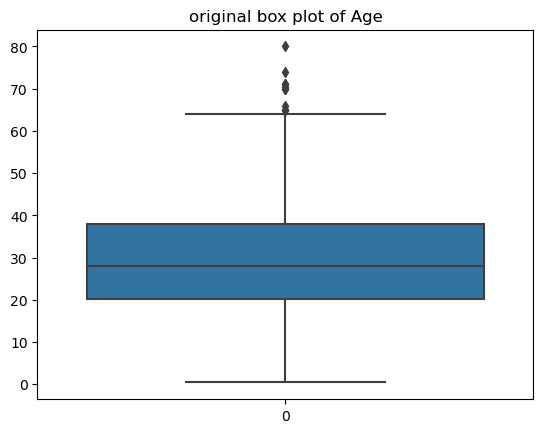

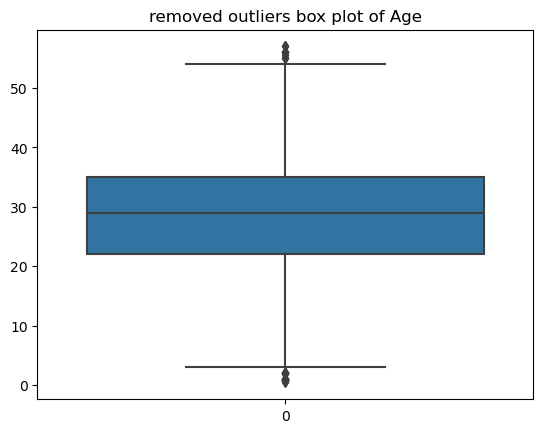

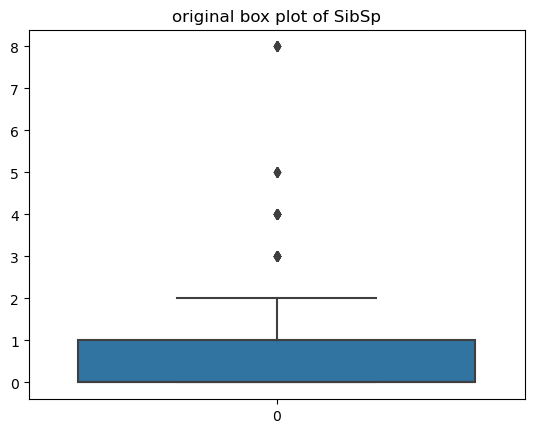

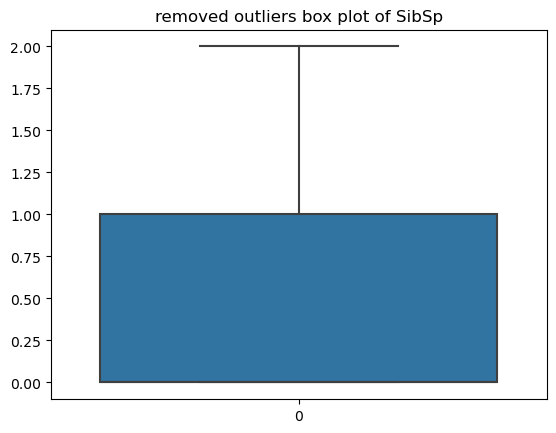

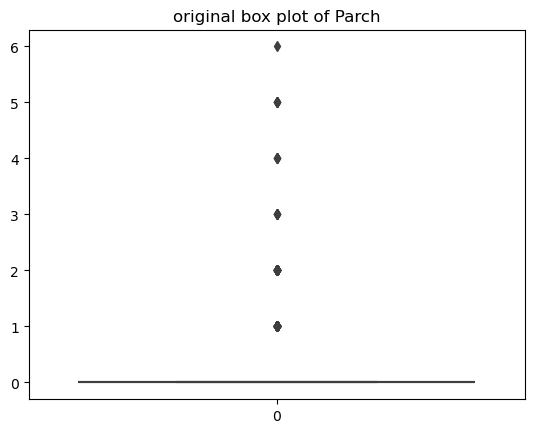

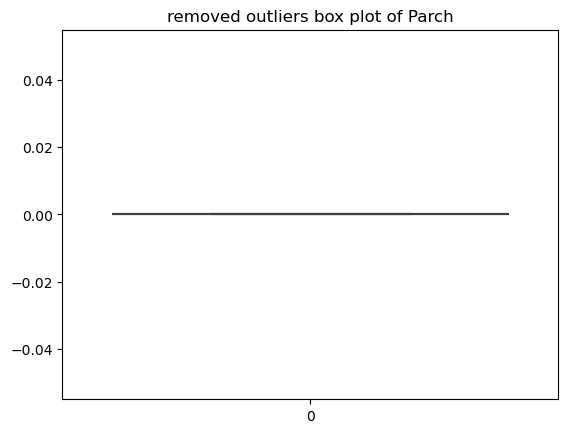

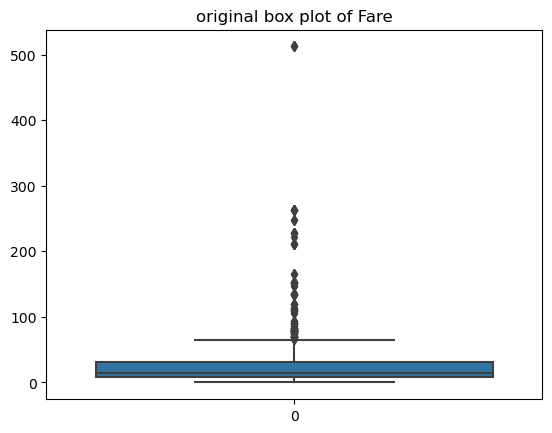

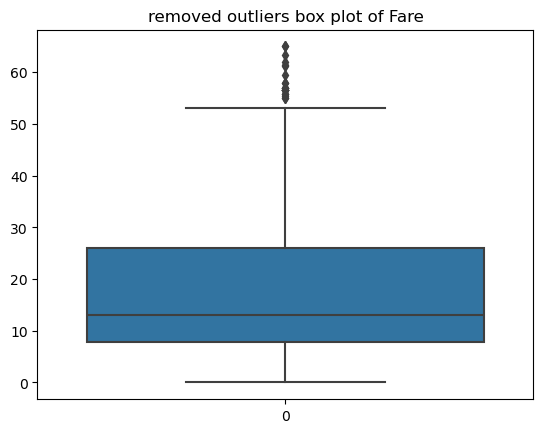

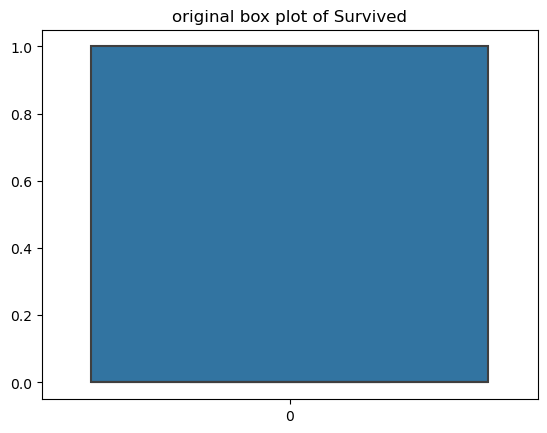

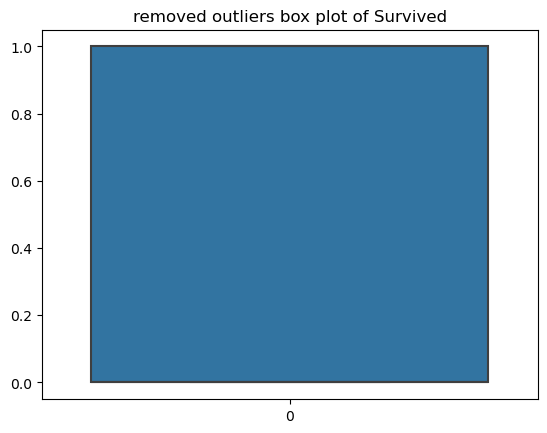

KeyError: 'Sex_male'

In [65]:
for i, col in enumerate(df_final):
    remove_outliers(col)

In [66]:
print(df_final[df_final['Fare'] > 400])

      Age  SibSp  Parch      Fare  Survived  Sex_male  Pclass
258  35.0    0.0    0.0  512.3292       1.0       0.0     0.0
679  36.0    0.0    1.0  512.3292       1.0       1.0     0.0
737  35.0    0.0    0.0  512.3292       1.0       1.0     0.0


I'm not removing any outlier because each brings informations

# Scaling values

## MinMax scaling

In [67]:
X = df_final[['Age','SibSp','Parch','Fare','Survived','Sex_male','Pclass']].values

In [68]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)

MinMaxScaler()

In [69]:
X_scaled = minmax_scaler.transform(X)

In [70]:
X_scaled

array([[0.27117366, 0.125     , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.4722292 , 0.125     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.28729999, 0.125     , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.39683338, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [71]:
df_final = pd.DataFrame(X_scaled, columns = ['Age','SibSp','Parch','Fare','Survived','Sex_male','Pclass'])

In [72]:
df_final.head()

Age  SibSp  Parch      Fare  Survived  Sex_male  Pclass
0  0.271174  0.125    0.0  0.014151       0.0       1.0     1.0
1  0.472229  0.125    0.0  0.139136       1.0       0.0     0.0
2  0.321438  0.000    0.0  0.015469       1.0       0.0     1.0
3  0.434531  0.125    0.0  0.103644       1.0       0.0     0.0
4  0.434531  0.000    0.0  0.015713       0.0       1.0     1.0

# Converting to .csv

In [73]:
df_final.to_csv('/home/estelle/code/titanic/titanic_preprocessed.csv')